Want, the ability to generate various tensors and measure their properties.
Pretty much, want to do unsupervised learning of matrices and tensors.
Properties are defined not by their values but by how they can be composed, transformed, ... Not sure how to make this happen, but !!!.

What are we generating based on?
- Structure/symmetry?
- How it transforms a space?
- Topology of a TN?
- ?


Is it possible to construct a toeplitz matrix with a tensor-network?


***

Toeplitz (can be used to encode convolutions), circulant (?) and hankel (can be used to encode automata!?).

Orthogonal, stochastic, orthonormal,

Block, block-diagonal (used to encode independent systems?), ?

Hermitian,

https://en.wikipedia.org/wiki/List_of_matrices


## Approaches to TN contraction

* Boundary conditions!?!?
* Algebraically contractible tensor networks
* 

https://en.wikipedia.org/wiki/Multigraph
https://en.wikipedia.org/wiki/Hypergraph

> As far as hypergraphs are concerned, a hypergraph is equivalent to a bi-partite graph, with two different set of nodes. One represents the regular nodes, the other a set of edges

http://20bits.com/article/graph-theory-part-ii-linear-algebra
http://www.math.utah.edu/~gustafso/s2017/2270/projects-2017/dylanJohnson/Dylan%20Johnson%20Graph%20Theory%20and%20Linear%20Algebra.pdf

In [12]:
import numpy as np
import numpy.random as rnd

import networkx as nx

In [13]:
class TreeTN():
    # https://arxiv.org/pdf/1710.04833.pdf
    def construct():
        pass
        
# cool. I can construct one. But how can I make a fast kernel for calculating it...
# that is what i need tensor-comprehension and/or xla and/or hand-written c/cuda.
# need to define matrix vector ops (and others) that can take advantage of the structure.

In [33]:
m = rnd.randint(0, 2, (10,10))
m

array([[1, 1, 0, 0, 0, 1, 0, 1, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 0, 1, 1, 0, 0],
       [1, 1, 0, 1, 0, 1, 1, 0, 1, 0],
       [0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 1, 0, 0, 1, 0],
       [1, 1, 1, 0, 0, 1, 1, 1, 1, 1]])

In [34]:
np.sum(m, axis=0)

array([6, 8, 3, 5, 3, 5, 5, 8, 5, 6])

In [35]:
np.sum(m, axis=1)

array([6, 3, 4, 5, 6, 4, 6, 7, 5, 8])

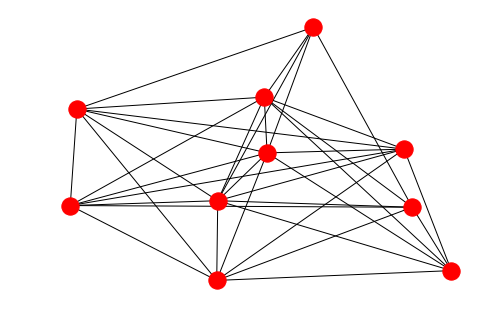

In [36]:
g = nx.from_numpy_matrix(m)
g = nx.convert_node_labels_to_integers(g)
nx.draw(g, pos=nx.spring_layout(g))

[[0 1 1 0 0 0 0 1]
 [1 0 1 1 0 0 0 0]
 [0 1 0 1 1 0 0 0]
 [0 0 1 0 1 1 0 0]
 [0 0 0 1 0 1 1 0]
 [0 0 0 0 1 0 1 1]
 [1 0 0 0 0 1 0 1]
 [1 1 0 0 0 0 1 0]]


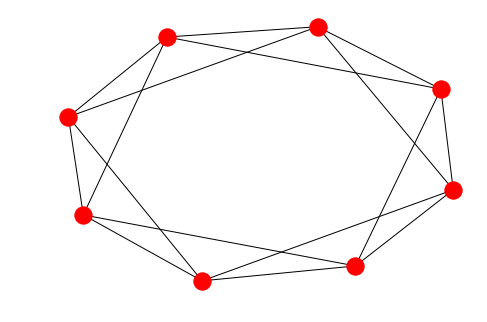

In [89]:
import scipy.linalg as lin
m = lin.circulant([0,1,0,0,0,0,1,1])
print(m)
g = nx.from_numpy_matrix(m)
g = nx.convert_node_labels_to_integers(g)
nx.draw(g, pos=nx.spring_layout(g))

[[0 1 0 1 1 1 0 1]
 [1 0 1 0 1 1 1 0]
 [0 1 0 1 0 1 1 1]
 [0 0 1 0 1 0 1 1]
 [0 0 0 1 0 1 0 1]
 [0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 1 0]]


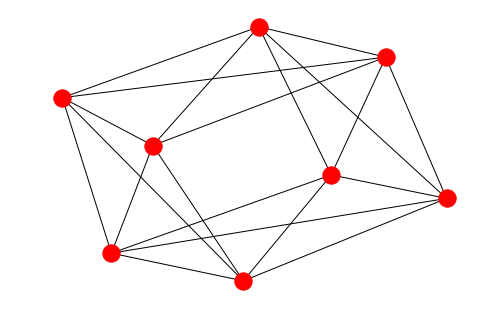

In [90]:
m = lin.toeplitz([0,1,0,0,0,0,0,1], [0,1,0,1,1,1,0,1])
print(m)
g = nx.from_numpy_matrix(m)
g = nx.convert_node_labels_to_integers(g)
nx.draw(g, pos=nx.spring_layout(g))

[[0 1 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1]
 [0 0 0 0 0 1 1 0]
 [0 0 0 0 1 1 0 1]
 [0 0 0 1 1 0 1 1]
 [0 0 1 1 0 1 1 0]
 [0 1 1 0 1 1 0 0]
 [1 1 0 1 1 0 0 1]]


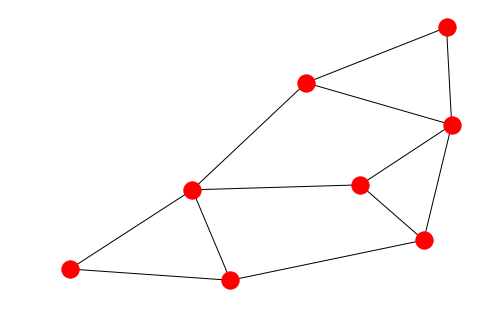

In [91]:
m = lin.hankel([0,1,0,0,0,0,0,1], [0,1,0,1,1,0,0,1])
print(m)
g = nx.from_numpy_matrix(m)
g = nx.convert_node_labels_to_integers(g)
nx.draw(g, pos=nx.spring_layout(g))

[[0. 0. 1. 1. 0. 0. 1. 1.]
 [0. 0. 1. 1. 0. 0. 1. 1.]
 [1. 1. 0. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 1.]
 [0. 0. 1. 1. 0. 0. 1. 1.]
 [1. 1. 0. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 1. 1. 0. 0.]]


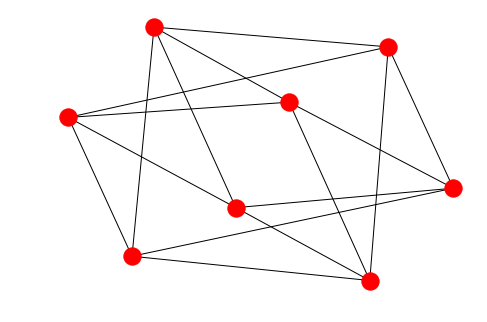

In [134]:
m = np.kron(lin.circulant([0,1,0,1]), np.ones((2,2)), )
print(m)
g = nx.from_numpy_matrix(m)
g = nx.convert_node_labels_to_integers(g)
nx.draw(g, pos=nx.spring_layout(g))

In [141]:
def construct_cores(m, k=2):  # assume all connections are of the same dimension
    d = np.sum(m ,axis=0)
    return [rnd.random([2]*int(i)) for i in d]

In [142]:
cores = construct_cores(m)
print([c.shape for c in cores])

[(2, 2, 2, 2), (2, 2, 2, 2), (2, 2, 2, 2), (2, 2, 2, 2), (2, 2, 2, 2), (2, 2, 2, 2), (2, 2, 2, 2), (2, 2, 2, 2)]


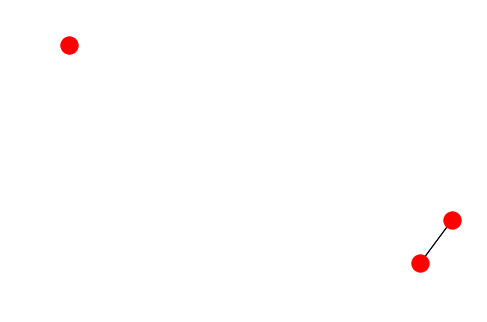

In [161]:
G = nx.MultiGraph()
G.add_node(1)
G.add_nodes_from([2,3])
G.add_edge(2,3) #G.add_edge(1,2)
G.add_edge(2,3)
nx.draw(G, pos=nx.spring_layout(G))